In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Load the dataset

df = pd.read_csv('playstore-analysis (2) (1).csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 1. Data clean up – Missing value treatment

In [3]:
print(f" the dataframe has \n Rows:{df.shape[0]}\n Column:{df.shape[1]}")

 the dataframe has 
 Rows:10841
 Column:13


In [4]:
print(f"DataFrame has {df.duplicated().sum()} duplicate values")

DataFrame has 483 duplicate values


In [5]:
# Removing Duplicate Values
df.drop_duplicates(inplace=True)

In [6]:
# writing a function to get all the details regarding the Data
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1465,40
Reviews,object,0,6002
Size,float64,0,460
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120



## a. Drop records where rating is missing since rating is our target/study variable

In [7]:
df['Rating'].isnull().sum()

1465

In [8]:
df.dropna(subset=['Rating'],inplace=True)

In [9]:
df.shape

(8893, 13)

## b. Check the null values for the Android Ver column.

### i. Are all 3 records having the same problem?

In [10]:
# we can clearly see that row 10472 has all the values in different format
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [11]:
df.drop(index=df[df['Android Ver'].isnull()].index[2],inplace=True)

### iii. Replace remaining missing values with the mode

In [12]:
df['Android Ver'].mode().values[0]

'4.1 and up'

In [13]:
df['Android Ver'].fillna(value=df['Android Ver'].mode().values[0],inplace=True)

In [14]:
df['Android Ver'].isnull().sum()

0

## c. Current ver – replace with most common value

In [15]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [16]:
df['Current Ver'].mode().values[0]

'Varies with device'

In [17]:
df['Current Ver'].fillna(value=df['Current Ver'].mode().values[0],inplace=True)

In [18]:
df['Current Ver'].isnull().sum()

0

In [19]:
df['Type'].value_counts()

Free    8279
Paid     613
Name: Type, dtype: int64

In [20]:
# Let's find 'mode' / most frequent value
df['Type'].mode()

print(f"The mode/ most frequent value is '{df['Type'].mode()[0]}'")

The mode/ most frequent value is 'Free'


In [21]:
# let's fill the missing value with the mode value.
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

# 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?
b. Price variable – remove $ sign and convert to float
c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
d. Convert all other identified columns to numeric
3. Sanity checks – check for the following and handle accor

## a. Which all variables need to be brought to numeric types?

In [22]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8196
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5992
Size,float64,0,413
Installs,object,0,19
Type,object,0,2
Price,object,0,73
Content Rating,object,0,6
Genres,object,0,115


In [23]:
# variables to be brought to numeric types 
# 1.Installs
# 2.Price
# 3.Reviews (obj dtype)

In [24]:
df['Installs'].value_counts().head()

1,000,000+     1486
10,000,000+    1132
100,000+       1110
10,000+         989
1,000+          698
Name: Installs, dtype: int64

In [25]:
df['Price'].value_counts().head()

0        8279
$2.99     110
$0.99     105
$4.99      68
$1.99      59
Name: Price, dtype: int64

In [26]:
df['Reviews'].dtype

dtype('O')

In [27]:
#installs column to int
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')

<ipython-input-27-1c343a654926>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


In [28]:
df['Installs'] = df['Installs'].astype(int)

In [29]:
df['Installs'].dtype

dtype('int32')

In [30]:
#price column to float
df['Price'] = df['Price'].str.replace('$','')

<ipython-input-30-43df22b14569>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','')


In [31]:
df['Price'] = df['Price'].astype(float)

In [32]:
df['Price'].dtype

dtype('float64')

In [33]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8196
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5992
Size,float64,0,413
Installs,int32,0,19
Type,object,0,2
Price,float64,0,73
Content Rating,object,0,6
Genres,object,0,115


In [34]:
df['Reviews'] = df['Reviews'].astype(int)

In [35]:
df['Reviews'].dtype

dtype('int32')

# 3. Sanity checks – check for the following and handle accordingly

## a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.

### i. Are there any such records? Drop if so.

In [36]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [37]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

## b. Reviews should not be more than installs as only those who installed can review the app.
### i. Are there any such records? Drop if so.

In [38]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [39]:
df.shape

(8892, 13)

In [40]:
df.drop(df[df['Reviews']>df['Installs']].index,axis=0,inplace=True)

In [41]:
df.shape

(8885, 13)

# 4. Identify and handle outliers –


## a. Price column
### i. Make suitable plot to identify outliers in price



C:\Users\Manju\Anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

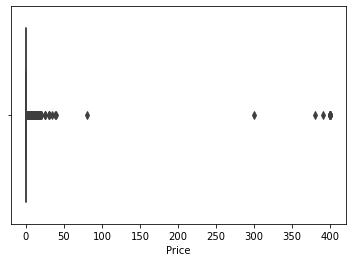

In [42]:
sns.boxplot('Price',data=df)

### ii. Do you expect apps on the play store to cost 200? Check out these cases
### iii. After dropping the useless records, make the suitable plot again to identify outliers

In [43]:
df[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [44]:
df.drop(df[df['Price'] > 200].index, axis=0,inplace=True)

C:\Users\Manju\Anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

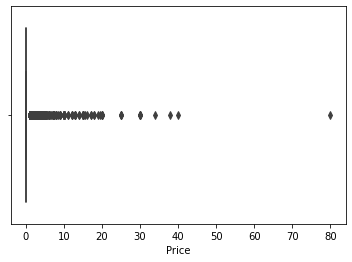

In [45]:
sns.boxplot('Price',data=df)

### iv. Limit data to records with price < 30

In [46]:
df.drop(df[df['Price'] > 30].index, axis=0,inplace=True)

In [47]:
df.shape

(8866, 13)

C:\Users\Manju\Anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

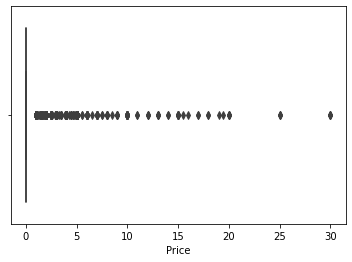

In [48]:
sns.boxplot('Price',data=df)

## b. Reviews column
### i. Make suitable plot
### ii. Limit data to apps with < 1 Million reviews

In [49]:
df.shape

(8866, 13)

In [50]:
df.drop(df[df['Reviews'] > 1000000].index,axis=0,inplace=True)

In [51]:
df.shape

(8225, 13)

## c. Installs
### i. What is the 95th percentile of the installs?
### ii. Drop records having a value more than the 95th percentile

In [52]:
df.shape

(8225, 13)

In [53]:
df['Installs'].quantile(0.95)

10000000.0

In [54]:
df.drop(df[df['Installs'] > df['Installs'].quantile(0.95) ].index,axis=0,inplace=True)

In [55]:
df.shape

(8043, 13)

# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) 
##    More skewed towards higher/lower values?

### a. How do you explain this?
### b. What is the implication of this on your analysis?

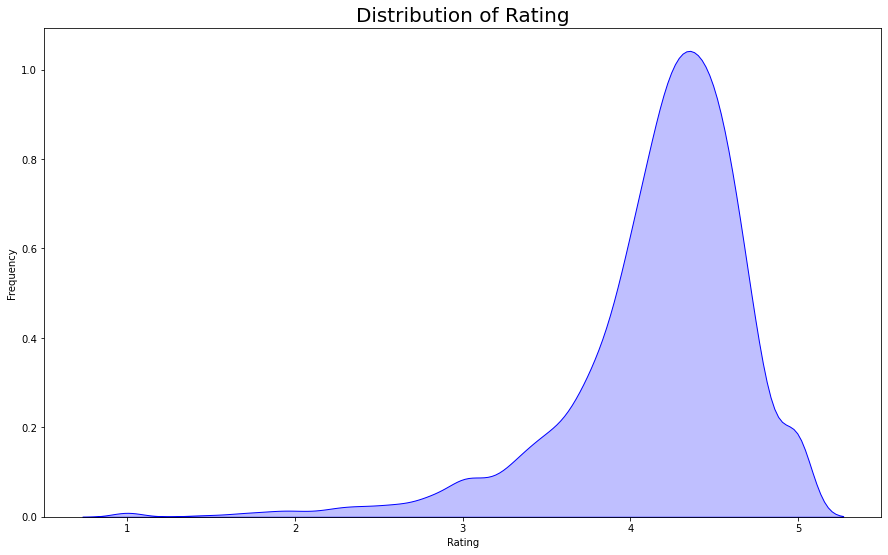

In [56]:
#by seeing the distribution it is said that the data is skewed towards higher values
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
sns.kdeplot(df.Rating, color="Blue", shade = True)
# sns.histplot(df.Rating)
plt.title('Distribution of Rating',size = 20);

### By seeing the above plot it is evident that most of the reviews are between 3.5 and 4.8

## 6. What are the top Content Rating values?
### a. Are there any values with very few records?
### b. If yes, drop those as they won’t help in the analysis

In [57]:
# It is seen that 
df['Content Rating'].value_counts()

Everyone           6510
Teen                854
Mature 17+          375
Everyone 10+        300
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [58]:
# dropping 'Adults only 18+','Unrated' columns
df.drop(df[df['Content Rating'].isin(['Adults only 18+','Unrated'])].index,axis=0,inplace=True)

## 7. Effect of size on rating

## a. Make a joinplot to understand the effect of size on rating


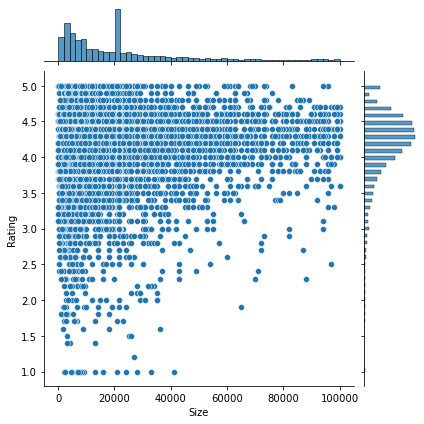

In [59]:
sns.jointplot(x='Size',y='Rating',data=df)

### b. Do you see any patterns?
Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

### c. How do you explain the pattern?
Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

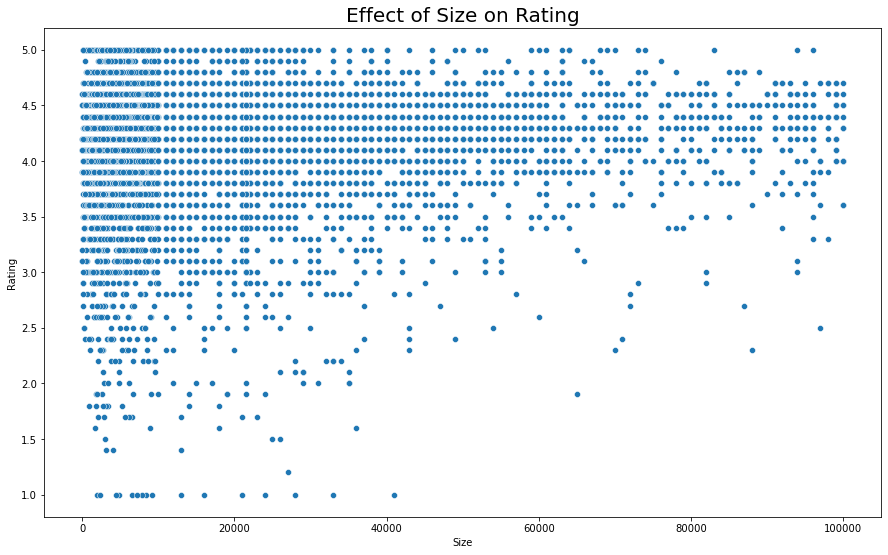

In [60]:
plt.figure(figsize=(15,9))
plt.xlabel("Size")
plt.ylabel("Rating")
sns.scatterplot(data=df, x="Size", y="Rating")
plt.title('Effect of Size on Rating',size = 20);


### As the Size of the app increases the averge rating also increases and so is the reverse.

# 8. Effect of price on rating


a. Make a jointplot (with regression line)

b. What pattern do you see?

c. How do you explain the pattern?



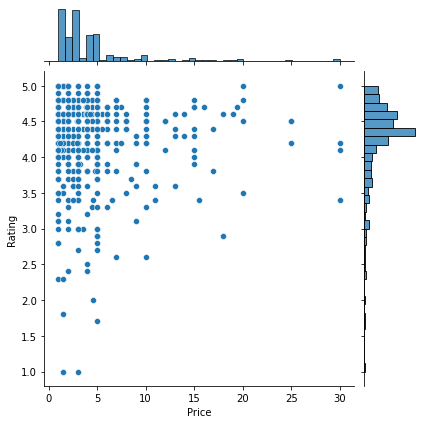

In [92]:

sns.jointplot(x='Price', y='Rating', data=df1)


## b. What pattern do you see?
On increasing the Price, Rating remains constant at 4.

### c. How do you explain the pattern?
On increasing the Price, Rating remains constant at 4.
Thus in conclusion that their is very less +ve correlation between Rating and Price.

## d. Replot the data, this time with only records with price > 0

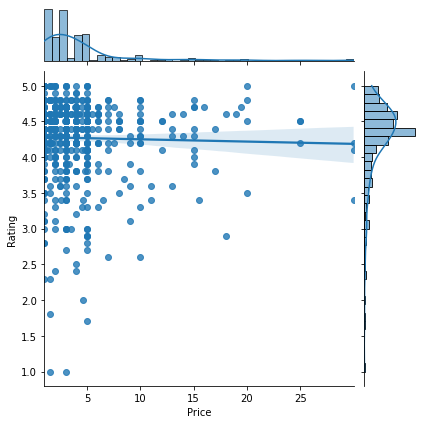

In [91]:

df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

## e. Does the pattern change?
Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [93]:
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.098851,0.119550,0.064939,-0.024670
Reviews,0.098851,1.000000,0.163410,0.784306,-0.039853
Size,0.119550,0.163410,1.000000,0.114317,0.026482
Installs,0.064939,0.784306,0.114317,1.000000,-0.057044
Price,-0.024670,-0.039853,0.026482,-0.057044,1.000000




## f. What is your overall inference on the effect of price on the rating

It is seen that apps with low price has customer satifaction of varying degrees but It is clearly seen that with apps of high price gives quality and satifaction for the users so the Average rating are high

# 9. Look at all the numeric interactions together –
## a. Make a pairplort with the columns - 'Reviews', 'Size', 'Rating', 'Price'

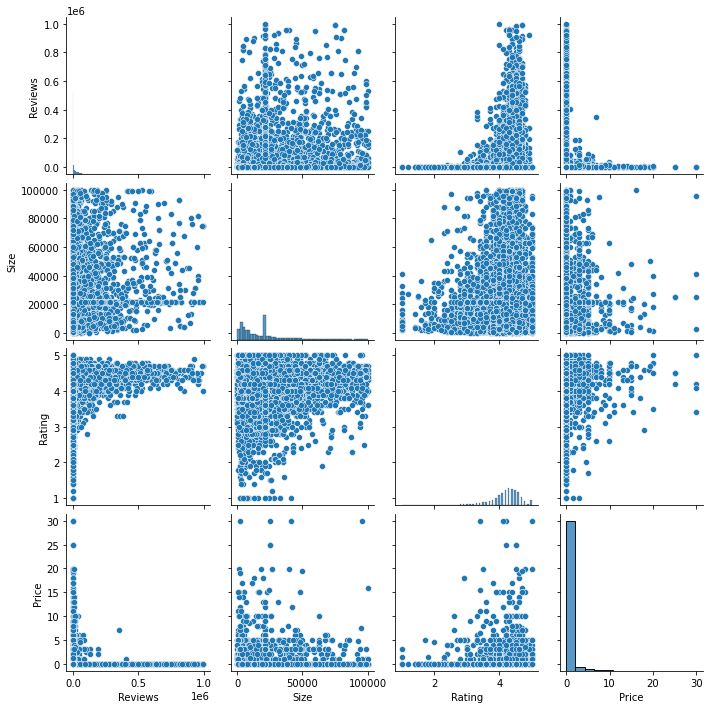

In [63]:
sns.pairplot(data=df[['Reviews', 'Size', 'Rating', 'Price']])

# 10. Rating vs. content rating
## a. Make a bar plot displaying the rating for each content rating

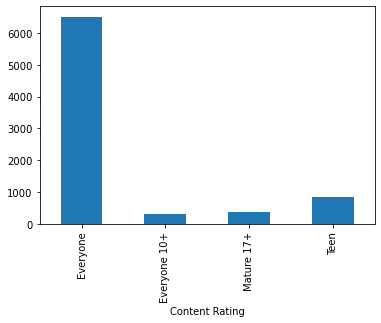

In [86]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar()
plt.show()


## b. Which metric would you use? Mean? Median? Some other quantile?

median is uded as an metric since there are outliers

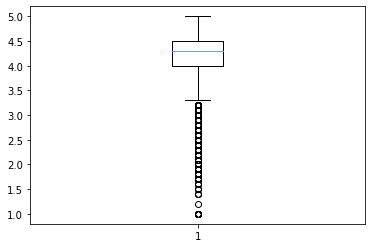

In [87]:
plt.boxplot(df['Rating'])
plt.show()


## c. Choose the right metric and plot

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

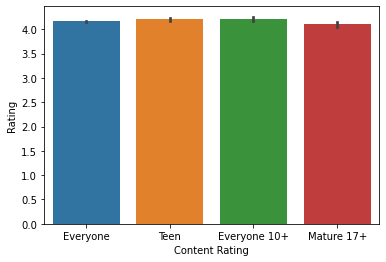

In [64]:
sns.barplot(x='Content Rating',y='Rating',data=df)

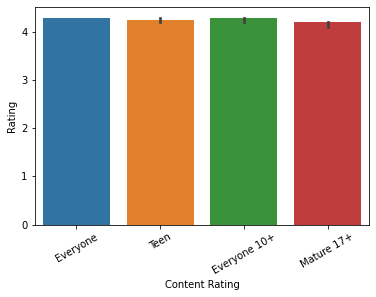

In [69]:
sns.barplot(x='Content Rating',y='Rating',data=df,estimator=np.median).set_xticklabels(labels=labels,rotation=30);


# 11. Content rating vs. size vs. rating – 3 variables at a time


## a. Create 5 buckets (20% records in each) based on Size

In [80]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.141638,4.238462,4.011628,4.198240
20k-40k,4.194439,4.156489,4.162406,4.176325
40k-60k,4.160398,4.263636,4.202703,4.233962
60k-80k,4.244792,4.280769,4.192857,4.274194
80k-100k,4.252414,4.304762,4.252632,4.267742



## b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination


In [81]:
temp3=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.04,3.50,3.90
20k-40k,3.9,3.90,3.94,3.90
40k-60k,3.9,4.06,4.10,4.00
60k-80k,4.0,4.00,3.96,4.00
80k-100k,4.0,4.10,4.00,4.02


## c. Make a heatmap of this
   ### i. Annotated
  


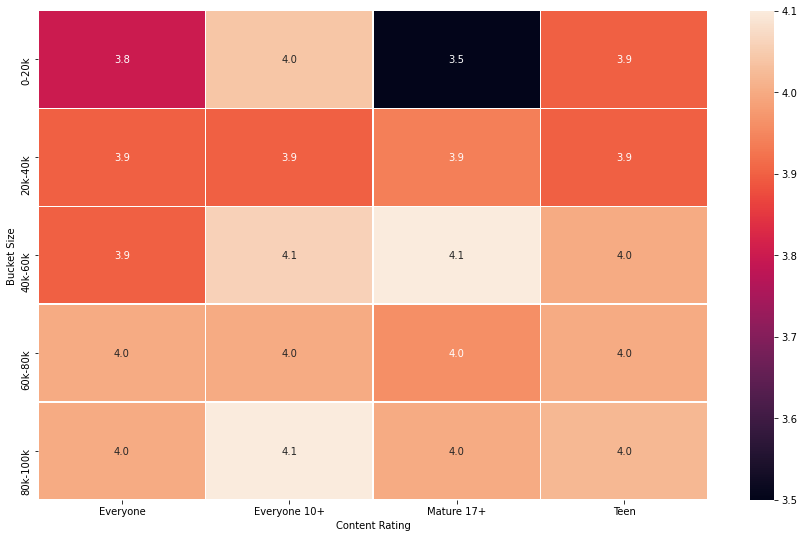

In [83]:
plt.figure(figsize=(15,9))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f')
plt.show()

 ### ii. Greens color map

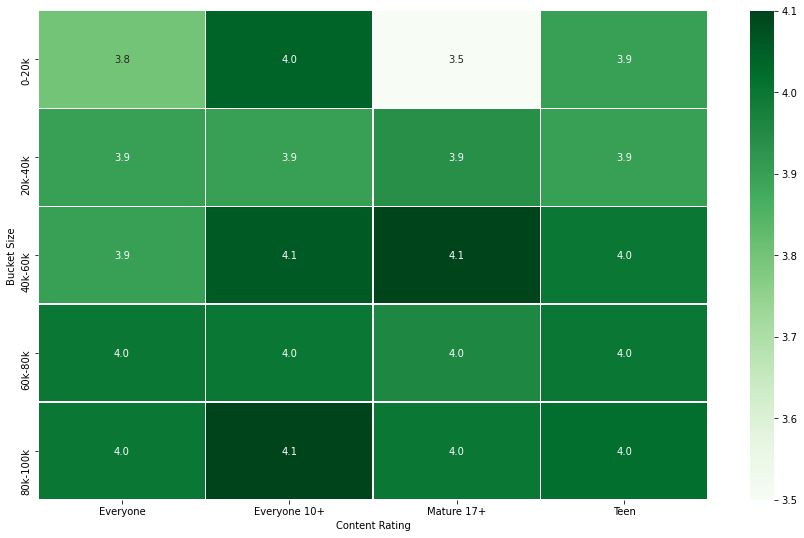

In [84]:
plt.figure(figsize=(15,9))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f')
plt.show()

## d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

based on above analysis we can say that its not true that only lighter apps are preferred in all categories.
we have seen that apps with size greater than 50k have  got highest ratings.
So we can conclude that heavier apps are preferred over lighter apps.